In [1]:
import gps_particle_data
import wget
import os
import numpy as np 
import time
import json
import sys
import math
from datetime import datetime, timedelta, date
from itertools import compress
from random import randint
import urllib2
import aacgmv2
import scipy
import matplotlib
from matplotlib import gridspec
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Test 9th Oct 2006

start_date = datetime(2006,10,8,0,0,0);
end_date = datetime(2006,10,9,0,0,0);
ms = gps_particle_data.meta_search();
ms.load_data(start_date,end_date);

dcor = {}
signal = 'rate_electron_measured'
output_data = ms.get_all_data_by_satellite()
for i in range(11):
    a0 = np.asarray(output_data[56][signal])[:,2]
    ar2 = np.asarray(output_data[56][signal])[:,i]
    cor = np.correlate(a0, ar2)/(math.sqrt(np.sum(a0**2)*np.sum(ar2**2)))
    dcor.update({i:cor})
print dcor


Loading data for satellite  56
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns56/ns56_061008_v1.03.ascii
{0: array([ 0.91266148]), 1: array([ 0.94975399]), 2: array([ 1.]), 3: array([ 0.81392439]), 4: array([ 0.57846106]), 5: array([ 0.47957602]), 6: array([ 0.43324751]), 7: array([ 0.44509568]), 8: array([ 0.57868584]), 9: array([ 0.52165241]), 10: array([ 0.48848895])}


In [3]:
xv = dcor.values()
for i in range(len(xv)):
    sum_bins_up_to = []
    fname = 'ch2_'+str(i)+'.ascii'
    cor = np.loadtxt(fname)
    sort = np.histogram(cor, bins = np.arange(min(cor), max(cor)+0.1, 0.05))
    for j in range(len(sort[1])):
        if sort[1][j] <= xv[i] <= sort[1][j+1]:
            for k in np.arange(j+1):
                sum_bins_up_to.append(sort[0][k])
            tot_sum_up_to = np.sum(sum_bins_up_to)
            pvalue = float(tot_sum_up_to)/float(np.sum(sort[0]))
            print fname, xv[i], '%.2f' % (pvalue)

ch2_0.ascii [ 0.91266148] 0.64
ch2_1.ascii [ 0.94975399] 0.76
ch2_2.ascii [ 1.] 1.00
ch2_3.ascii [ 0.81392439] 0.10
ch2_4.ascii [ 0.57846106] 0.13
ch2_5.ascii [ 0.47957602] 0.18
ch2_6.ascii [ 0.43324751] 0.19
ch2_7.ascii [ 0.44509568] 0.14
ch2_8.ascii [ 0.57868584] 0.28
ch2_9.ascii [ 0.52165241] 0.17
ch2_10.ascii [ 0.48848895] 0.22


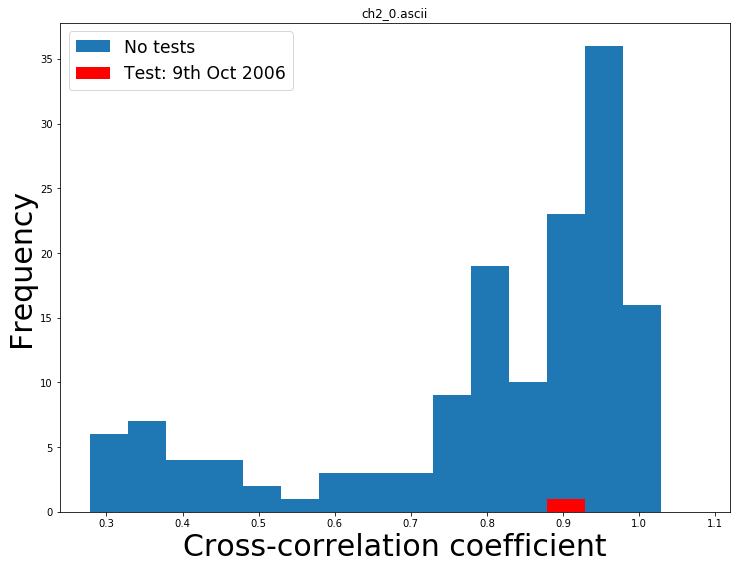

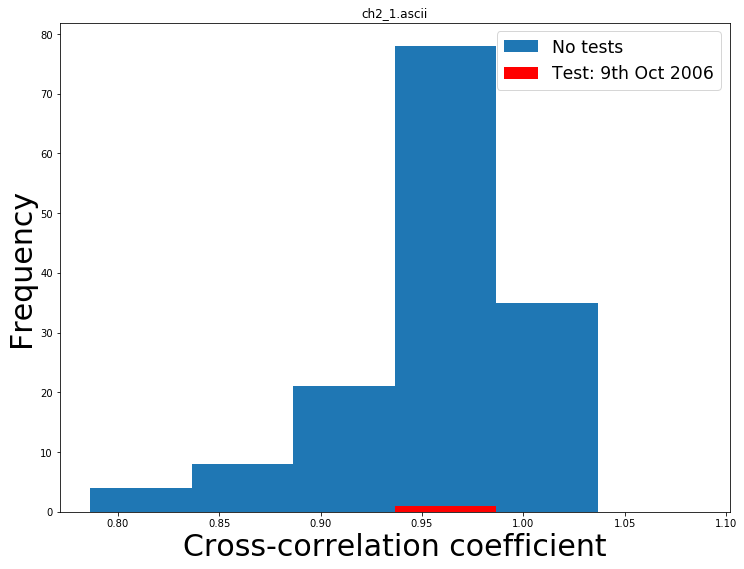

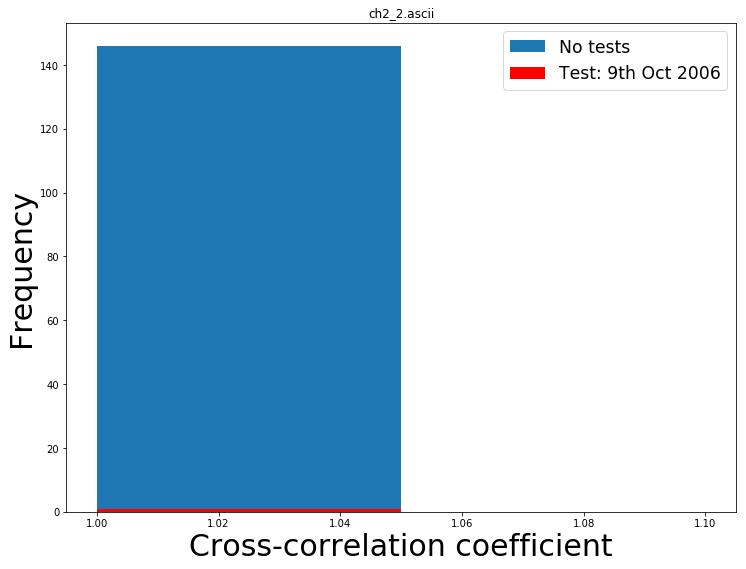

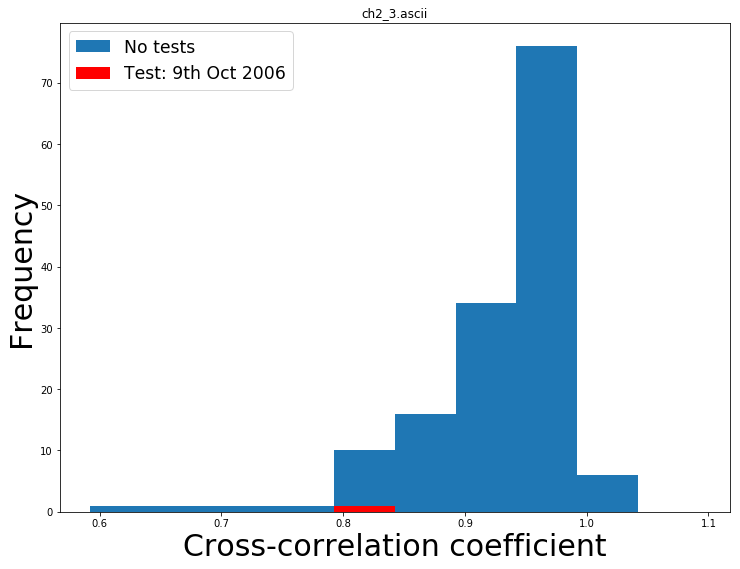

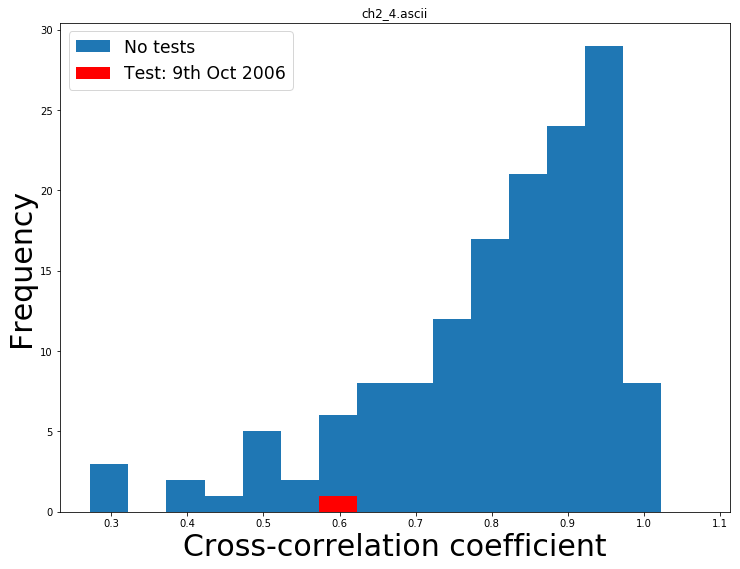

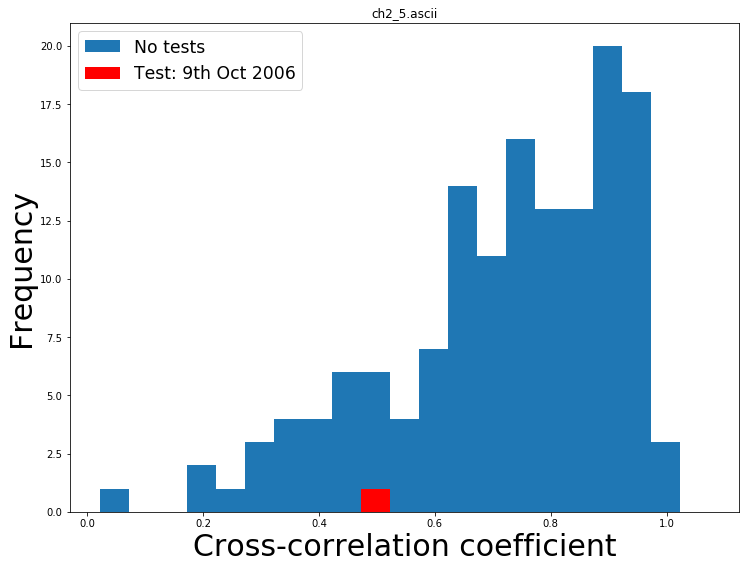

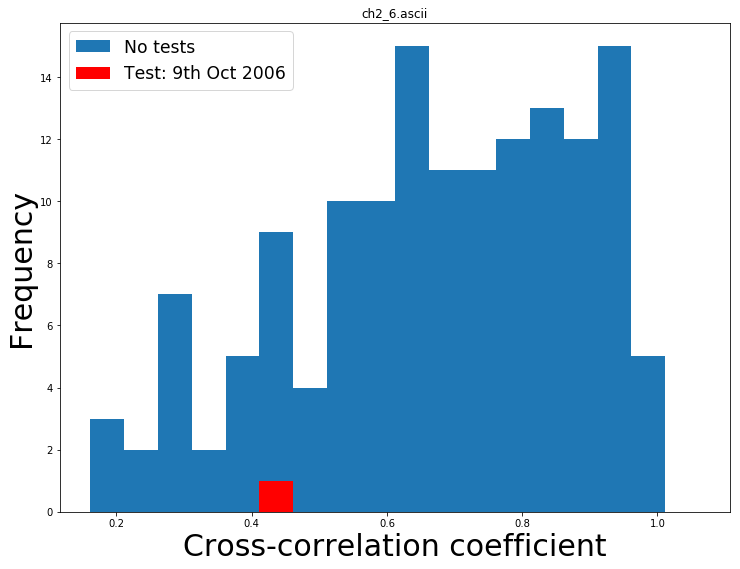

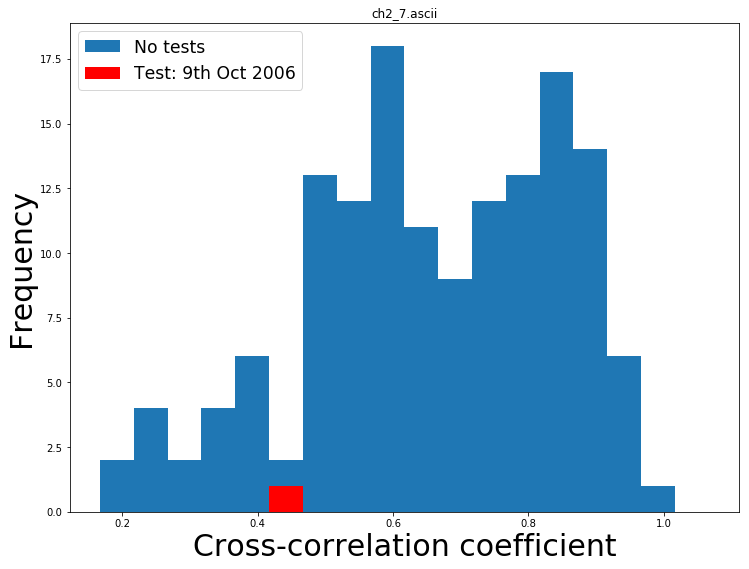

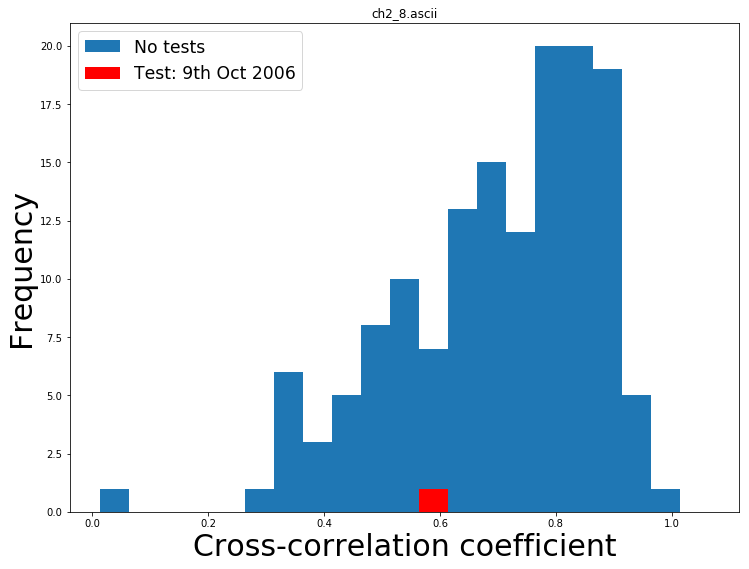

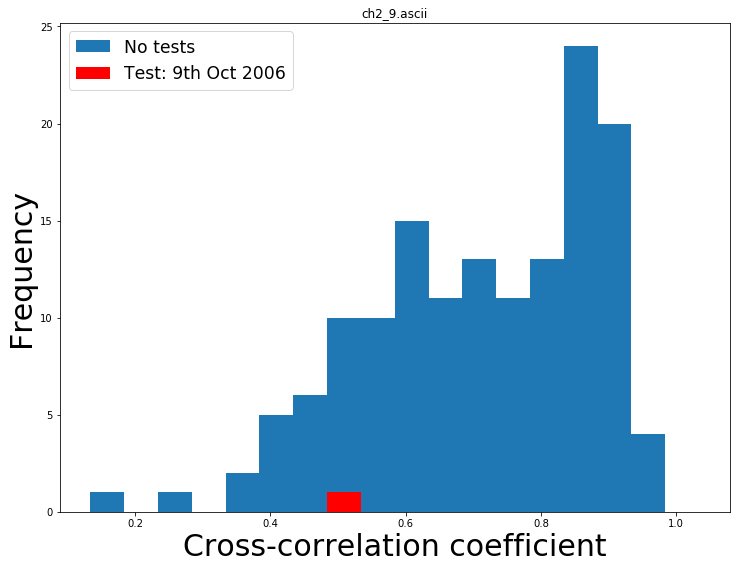

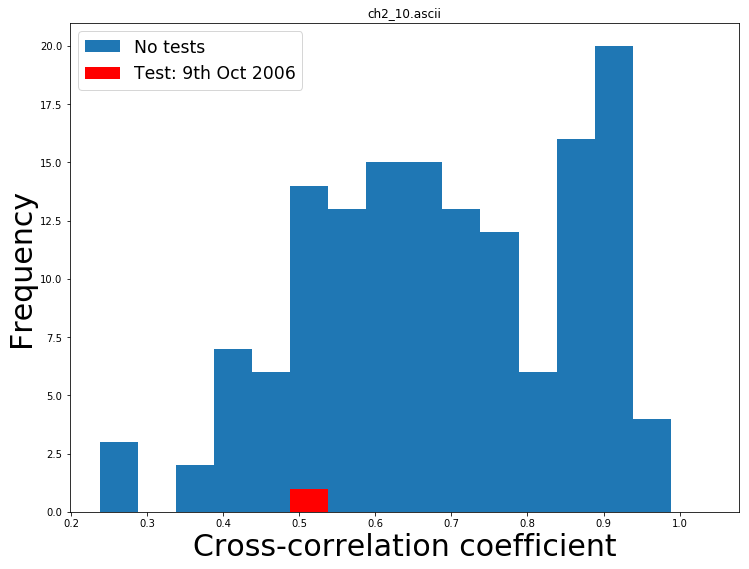

In [4]:
for i in range(11):
    fname = 'ch2_'+str(i)+'.ascii'
    fig = plt.figure(figsize=(12, 9))
    ax = fig.add_subplot(111)
    cor = np.loadtxt(fname)
    ax.hist(cor, bins = np.arange(min(cor), max(cor)+0.1, 0.05), label = 'No tests')
    ax.hist(xv[i], np.arange(min(cor), max(cor)+0.1, 0.05), color = 'red', label = 'Test: 9th Oct 2006')
    plt.title(fname)
    plt.xlabel('Cross-correlation coefficient', fontsize = 30)
    plt.ylabel('Frequency', fontsize = 30)
    plt.legend(fontsize = 'xx-large')
    plt.show()

In [5]:
#Test 25th May 2009

start_date = datetime(2009,5,20,0,0,0);
end_date = datetime(2009,5,26,0,0,0);
ms = gps_particle_data.meta_search();
ms.load_data(start_date,end_date);

dcor = {}
signal = 'rate_electron_measured'
output_data = ms.get_all_data_by_satellite()
for i in range(11):
    a0 = np.asarray(output_data[56][signal])[:,2]
    ar2 = np.asarray(output_data[56][signal])[:,i]
    cor = np.correlate(a0, ar2)/(math.sqrt(np.sum(a0**2)*np.sum(ar2**2)))
    dcor.update({i:cor})
print dcor


Loading data for satellite  56
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns56/ns56_090524_v1.03.ascii
{0: array([ 0.23554187]), 1: array([ 0.74258099]), 2: array([ 1.]), 3: array([ 0.94603438]), 4: array([ 0.90324178]), 5: array([ 0.8012095]), 6: array([ 0.8139127]), 7: array([ 0.85653208]), 8: array([ 0.84547122]), 9: array([ 0.85168144]), 10: array([ 0.85263454])}


In [6]:
xv = dcor.values()
for i in range(len(xv)):
    sum_bins_up_to = []
    fname = 'ch2_'+str(i)+'.ascii'
    cor = np.loadtxt(fname)
    sort = np.histogram(cor, bins = np.arange(min(cor), max(cor)+0.1, 0.05))
    for j in range(len(sort[1])):
        if sort[1][j] <= xv[i] <= sort[1][j+1]:
            for k in np.arange(j+1):
                sum_bins_up_to.append(sort[0][k])
            tot_sum_up_to = np.sum(sum_bins_up_to)
            pvalue = float(tot_sum_up_to)/float(np.sum(sort[0]))
            print fname, xv[i], '%.2f' % (pvalue)

ch2_2.ascii [ 1.] 1.00
ch2_3.ascii [ 0.94603438] 0.96
ch2_4.ascii [ 0.90324178] 0.75
ch2_5.ascii [ 0.8012095] 0.63
ch2_6.ascii [ 0.8139127] 0.78
ch2_7.ascii [ 0.85653208] 0.86
ch2_8.ascii [ 0.84547122] 0.83
ch2_9.ascii [ 0.85168144] 0.84
ch2_10.ascii [ 0.85263454] 0.84


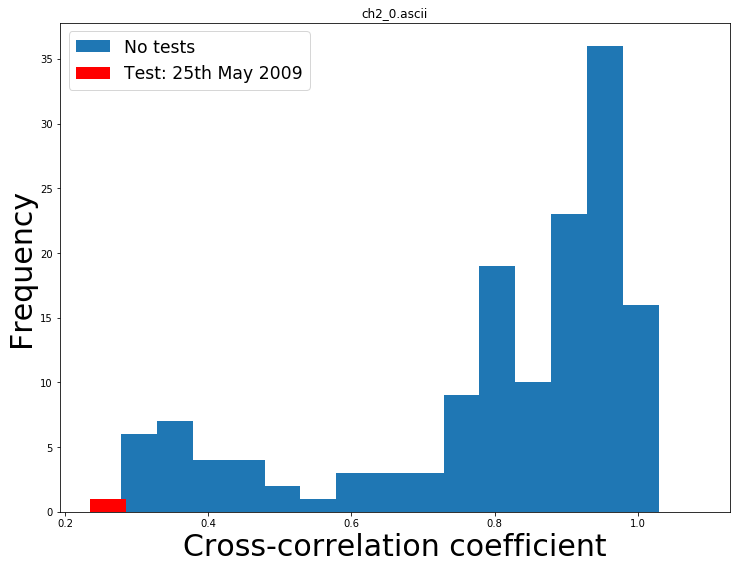

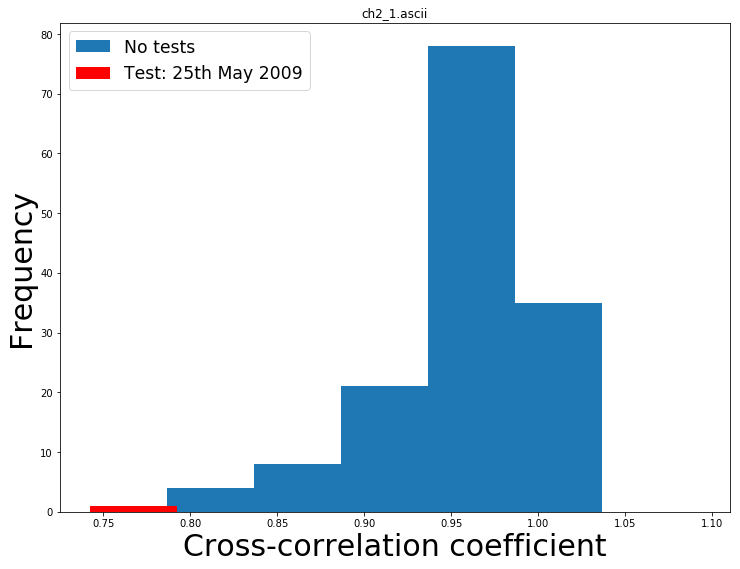

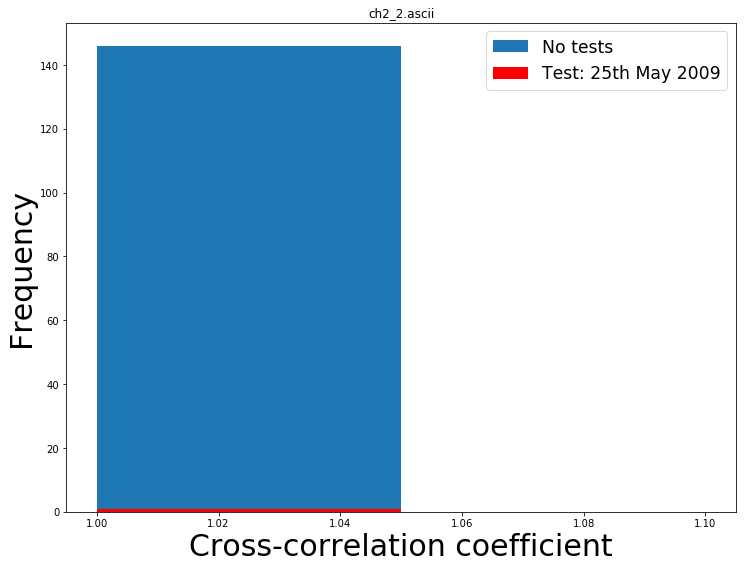

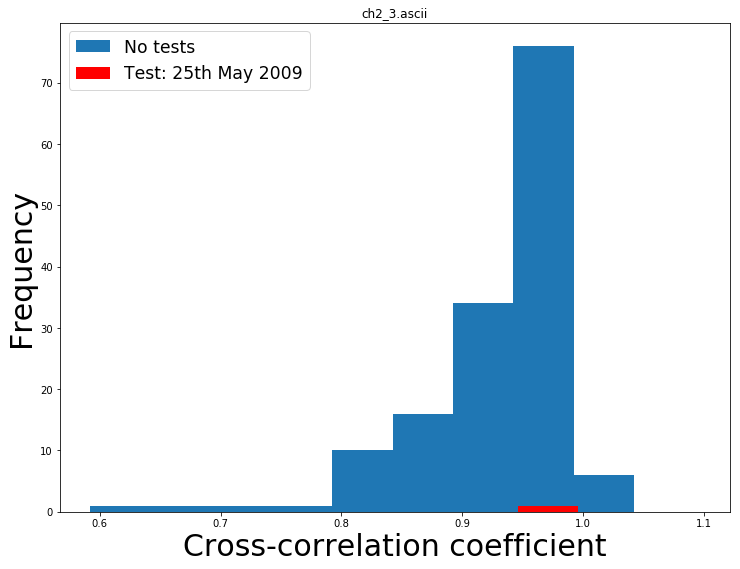

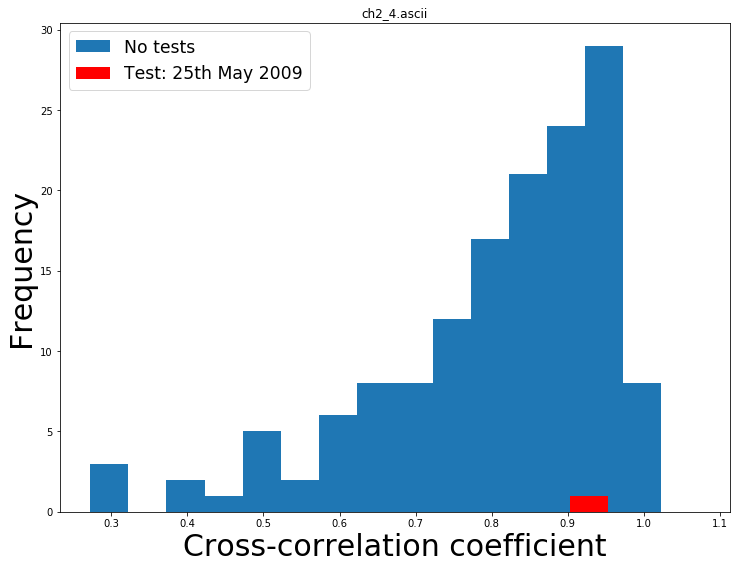

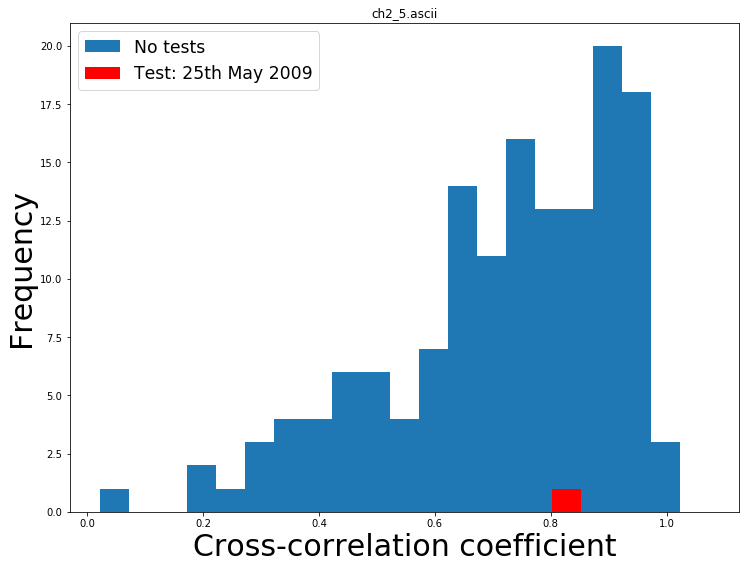

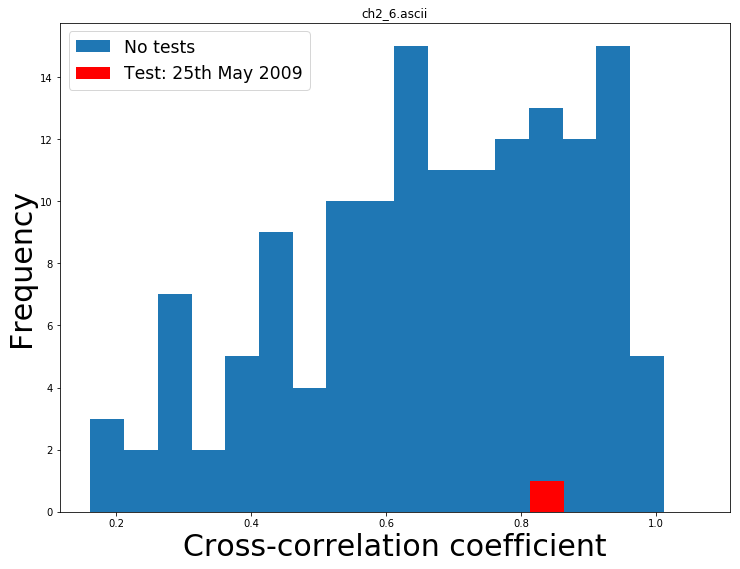

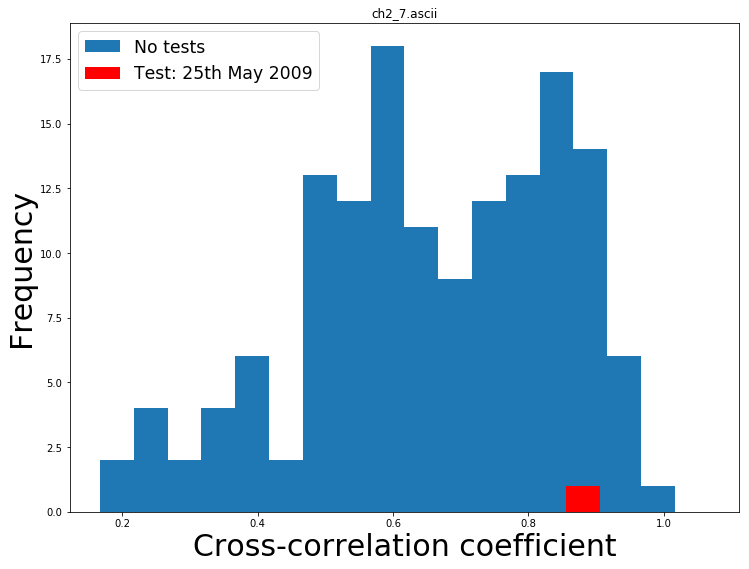

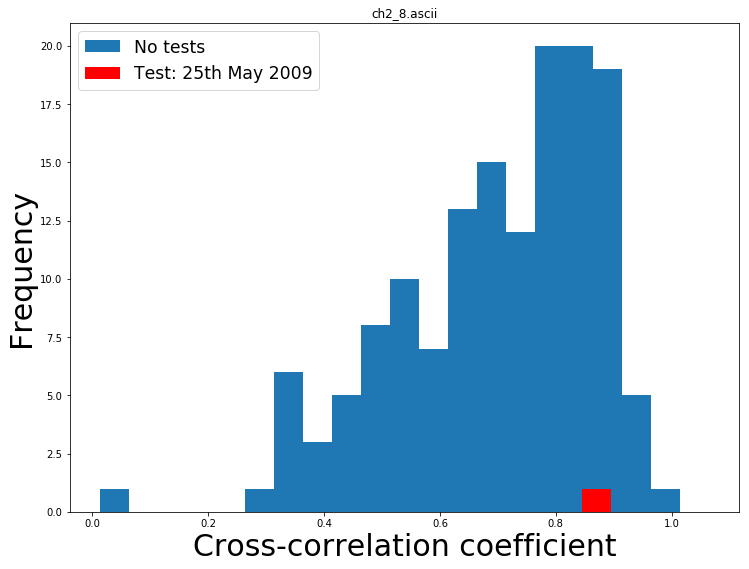

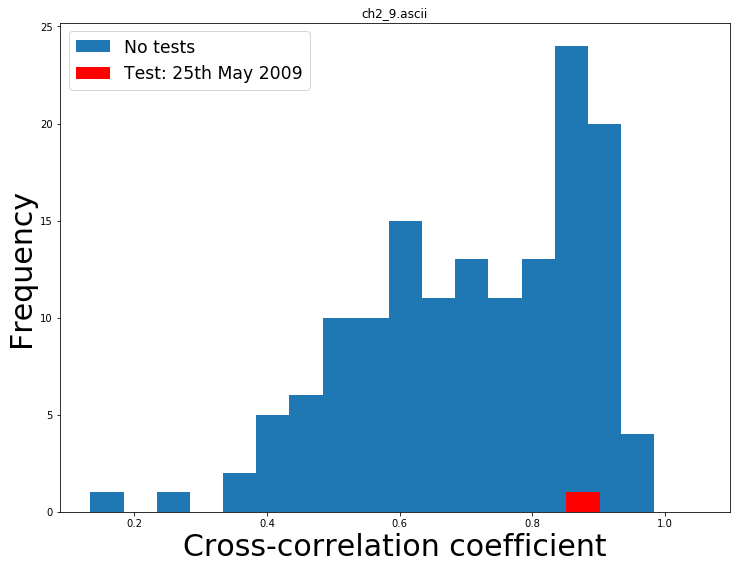

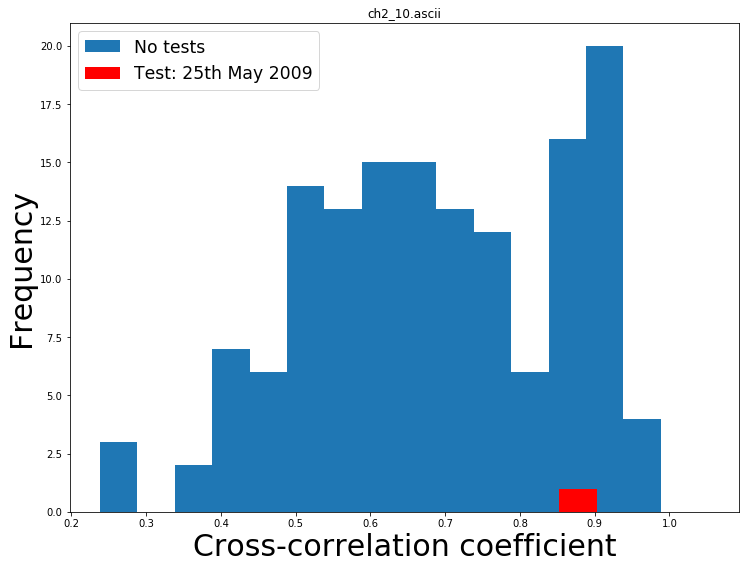

In [8]:
for i in range(11):
    fname = 'ch2_'+str(i)+'.ascii'
    fig = plt.figure(figsize=(12, 9))
    ax = fig.add_subplot(111)
    cor = np.loadtxt(fname)
    ax.hist(cor, bins = np.arange(min(cor), max(cor)+0.1, 0.05), label = 'No tests')
    ax.hist(xv[i], np.arange(min(xv[i]), max(cor)+0.1, 0.05), color = 'red', label = 'Test: 25th May 2009')
    plt.title(fname)
    plt.xlabel('Cross-correlation coefficient', fontsize = 30)
    plt.ylabel('Frequency', fontsize = 30)
    plt.legend(fontsize = 'xx-large')
    plt.show()

In [9]:
#Test 12th Feb 2013

start_date = datetime(2013,2,9,0,0,0);
end_date = datetime(2013,2,13,0,0,0);
ms = gps_particle_data.meta_search();
ms.load_data(start_date,end_date);

dcor = {}
signal = 'rate_electron_measured'
output_data = ms.get_all_data_by_satellite()
for i in range(11):
    a0 = np.asarray(output_data[56][signal])[:,2]
    ar2 = np.asarray(output_data[56][signal])[:,i]
    cor = np.correlate(a0, ar2)/(math.sqrt(np.sum(a0**2)*np.sum(ar2**2)))
    dcor.update({i:cor})
print dcor


Loading data for satellite  56
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns56/ns56_130210_v1.03.ascii
{0: array([ 0.44425641]), 1: array([ 0.84510738]), 2: array([ 1.]), 3: array([ 0.94944766]), 4: array([ 0.58362166]), 5: array([ 0.34096039]), 6: array([ 0.24985921]), 7: array([ 0.21219473]), 8: array([ 0.27366882]), 9: array([ 0.36621976]), 10: array([ 0.40079952])}


In [10]:
xv = dcor.values()
for i in range(len(xv)):
    sum_bins_up_to = []
    fname = 'ch2_'+str(i)+'.ascii'
    cor = np.loadtxt(fname)
    sort = np.histogram(cor, bins = np.arange(min(cor), max(cor)+0.1, 0.05))
    for j in range(len(sort[1])):
        if sort[1][j] <= xv[i] <= sort[1][j+1]:
            for k in np.arange(j+1):
                sum_bins_up_to.append(sort[0][k])
            tot_sum_up_to = np.sum(sum_bins_up_to)
            pvalue = float(tot_sum_up_to)/float(np.sum(sort[0]))
            print fname, xv[i], '%.2f' % (pvalue)

ch2_0.ascii [ 0.44425641] 0.14
ch2_1.ascii [ 0.84510738] 0.08
ch2_2.ascii [ 1.] 1.00
ch2_3.ascii [ 0.94944766] 0.96
ch2_4.ascii [ 0.58362166] 0.13
ch2_5.ascii [ 0.34096039] 0.08
ch2_6.ascii [ 0.24985921] 0.03
ch2_7.ascii [ 0.21219473] 0.01
ch2_8.ascii [ 0.27366882] 0.01
ch2_9.ascii [ 0.36621976] 0.03
ch2_10.ascii [ 0.40079952] 0.08


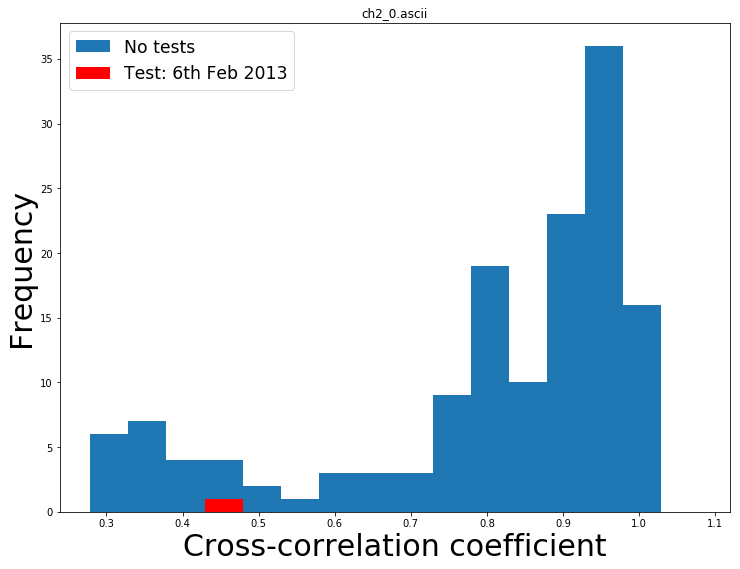

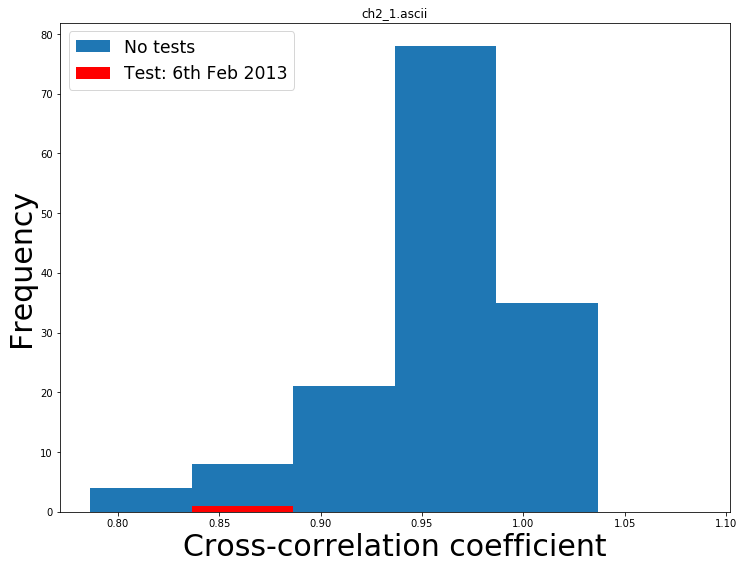

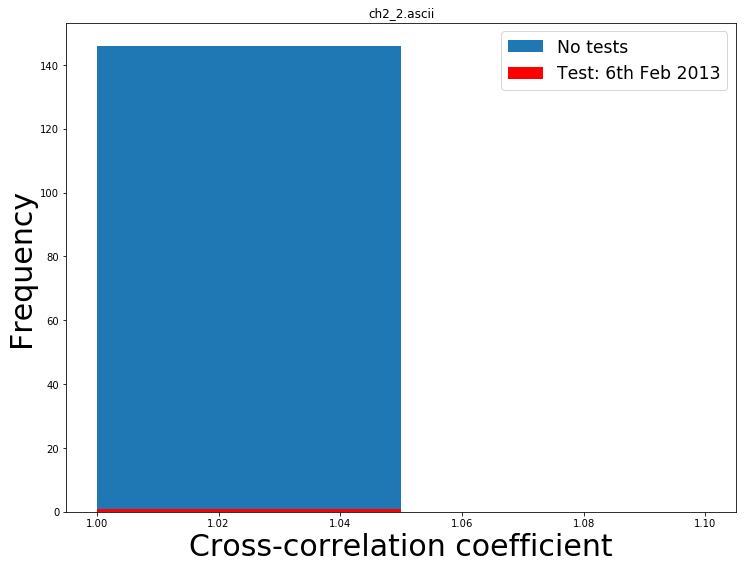

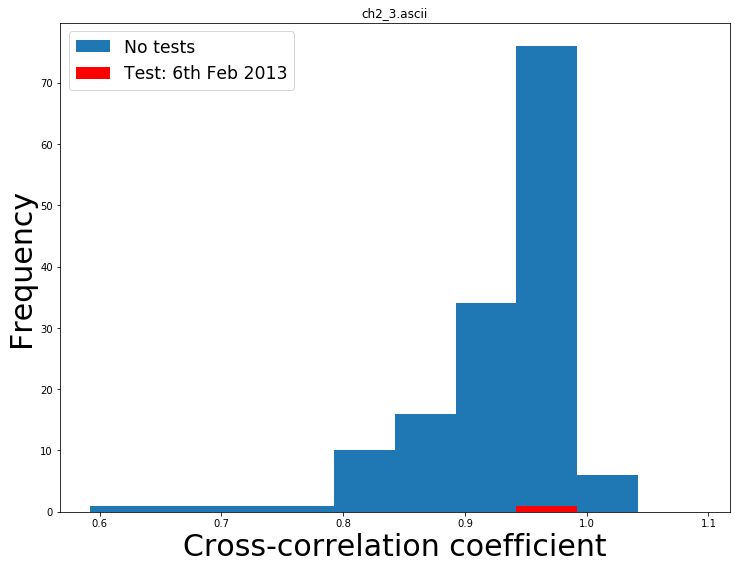

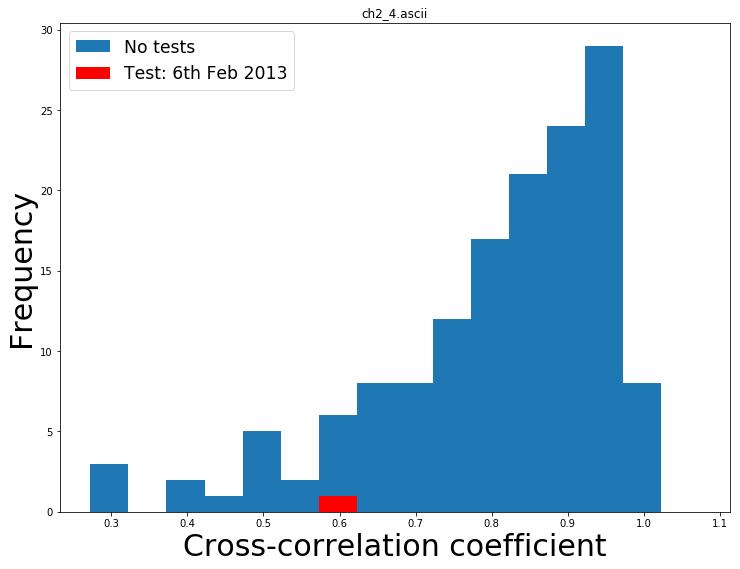

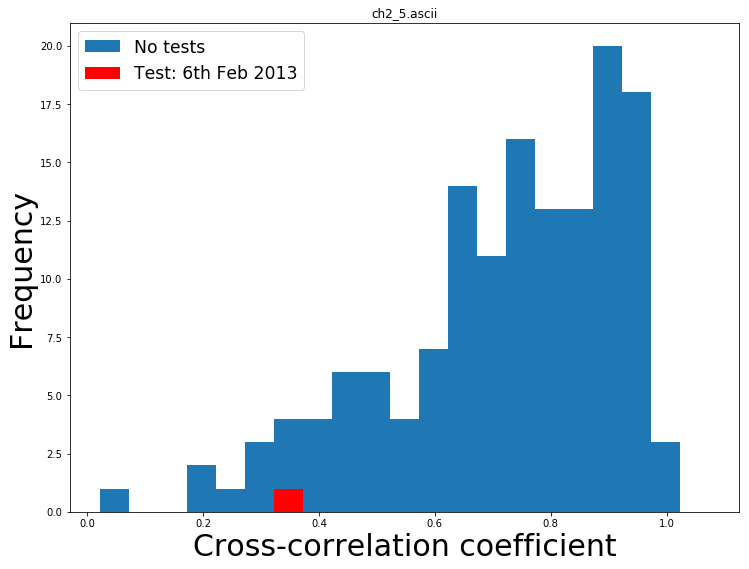

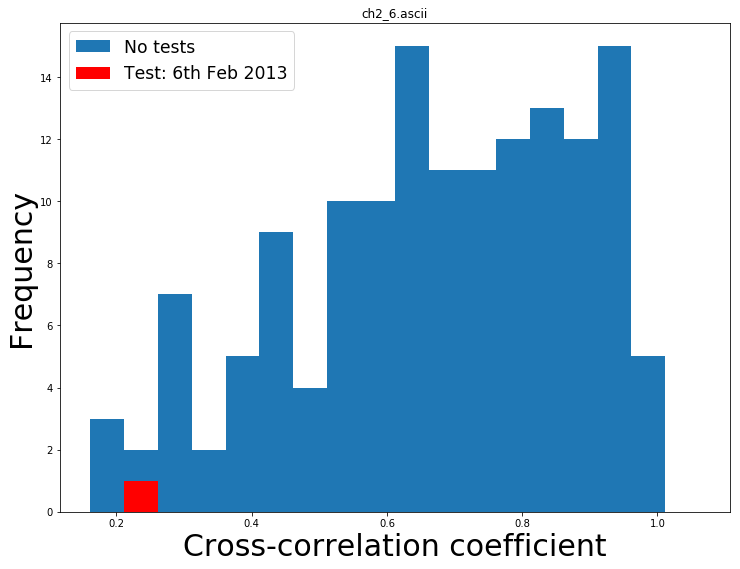

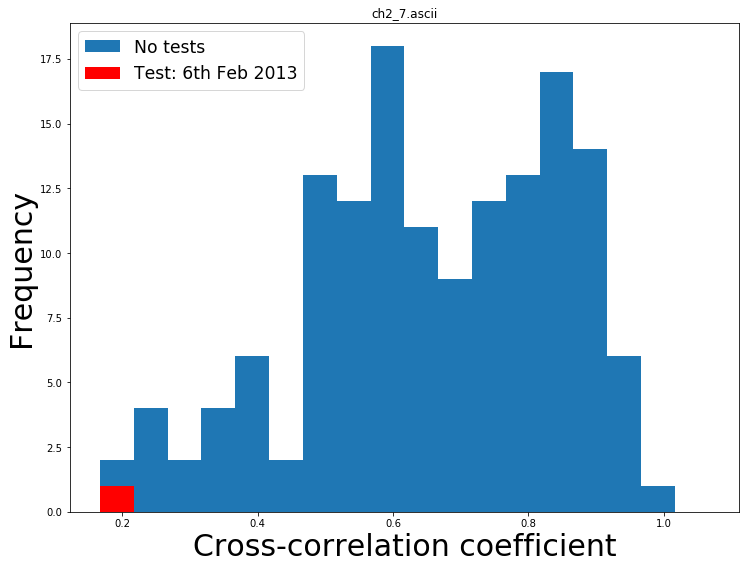

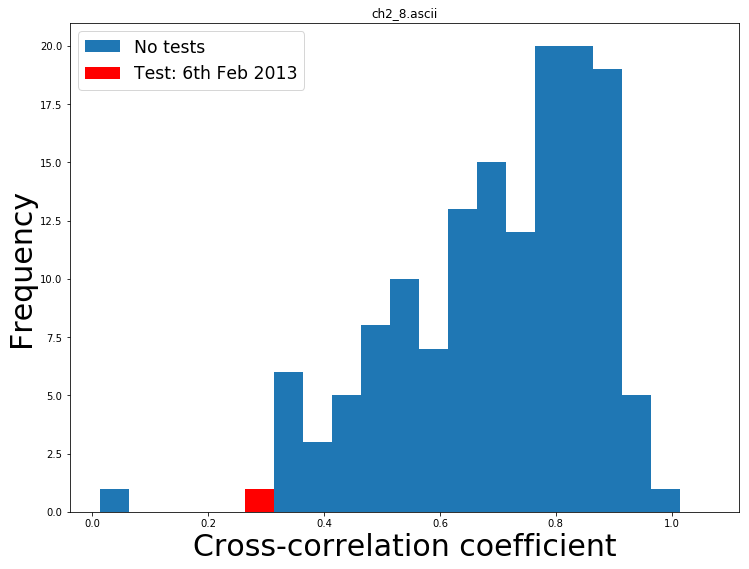

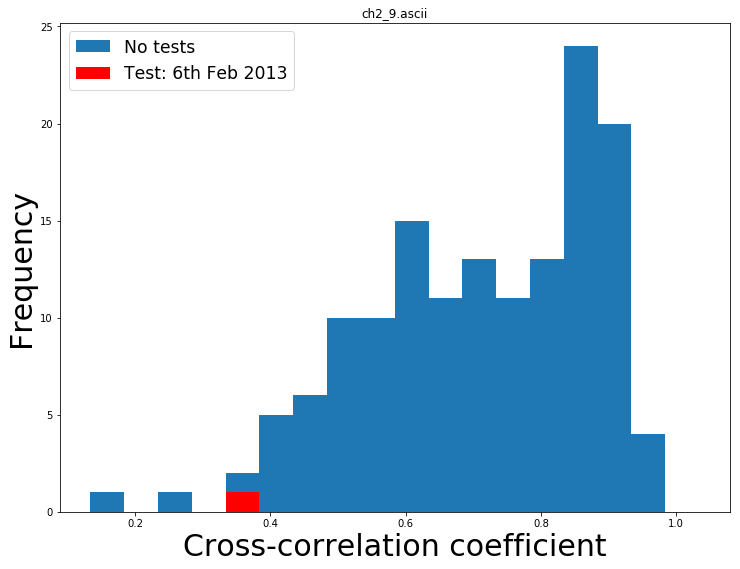

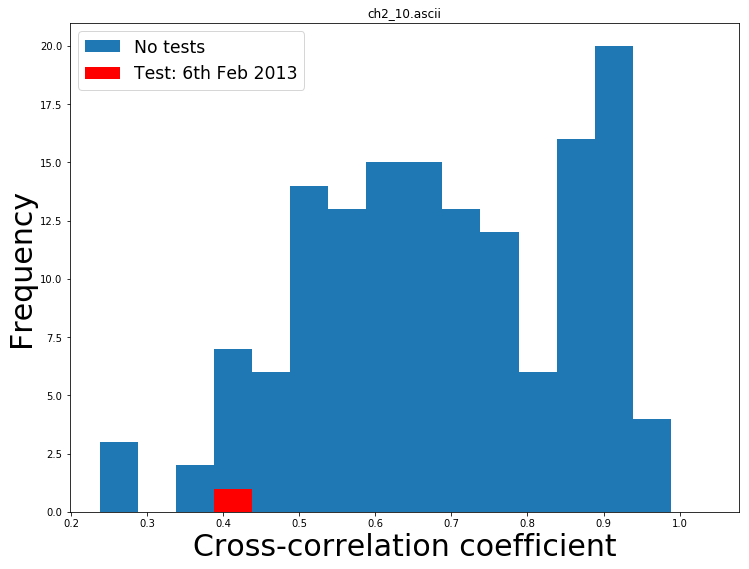

In [11]:
for i in range(11):
    fname = 'ch2_'+str(i)+'.ascii'
    fig = plt.figure(figsize=(12, 9))
    ax = fig.add_subplot(111)
    cor = np.loadtxt(fname)
    ax.hist(cor, bins = np.arange(min(cor), max(cor)+0.1, 0.05), label = 'No tests')
    ax.hist(xv[i], np.arange(min(cor), max(cor)+0.1, 0.05), color = 'red', label = 'Test: 6th Feb 2013')
    plt.title(fname)
    plt.xlabel('Cross-correlation coefficient', fontsize = 30)
    plt.ylabel('Frequency', fontsize = 30)
    plt.legend(fontsize = 'xx-large')
    plt.show()

In [13]:
#Test 6th Jan 2016

start_date = datetime(2016,1,2,0,0,0);
end_date = datetime(2016,1,7,0,0,0);
ms = gps_particle_data.meta_search();
ms.load_data(start_date,end_date);

dcor = {}
signal = 'rate_electron_measured'
output_data = ms.get_all_data_by_satellite()
for i in range(11):
    a0 = np.asarray(output_data[56][signal])[:,2]
    ar2 = np.asarray(output_data[56][signal])[:,i]
    cor = np.correlate(a0, ar2)/(math.sqrt(np.sum(a0**2)*np.sum(ar2**2)))
    dcor.update({i:cor})
print dcor


Loading data for satellite  56
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns56/ns56_160103_v1.03.ascii
{0: array([ 0.61118363]), 1: array([ 0.98627214]), 2: array([ 1.]), 3: array([ 0.98665615]), 4: array([ 0.96080355]), 5: array([ 0.9389024]), 6: array([ 0.919697]), 7: array([ 0.90039252]), 8: array([ 0.91574764]), 9: array([ 0.93251445]), 10: array([ 0.93534256])}


In [14]:
xv = dcor.values()
for i in range(len(xv)):
    sum_bins_up_to = []
    fname = 'ch2_'+str(i)+'.ascii'
    cor = np.loadtxt(fname)
    sort = np.histogram(cor, bins = np.arange(min(cor), max(cor)+0.1, 0.05))
    for j in range(len(sort[1])):
        if sort[1][j] <= xv[i] <= sort[1][j+1]:
            for k in np.arange(j+1):
                sum_bins_up_to.append(sort[0][k])
            tot_sum_up_to = np.sum(sum_bins_up_to)
            pvalue = float(tot_sum_up_to)/float(np.sum(sort[0]))
            print fname, xv[i], '%.2f' % (pvalue)

ch2_0.ascii [ 0.61118363] 0.18
ch2_1.ascii [ 0.98627214] 0.76
ch2_2.ascii [ 1.] 1.00
ch2_3.ascii [ 0.98665615] 0.96
ch2_4.ascii [ 0.96080355] 0.95
ch2_5.ascii [ 0.9389024] 0.98
ch2_6.ascii [ 0.919697] 0.97
ch2_7.ascii [ 0.90039252] 0.95
ch2_8.ascii [ 0.91574764] 0.99
ch2_9.ascii [ 0.93251445] 0.97
ch2_10.ascii [ 0.93534256] 0.97


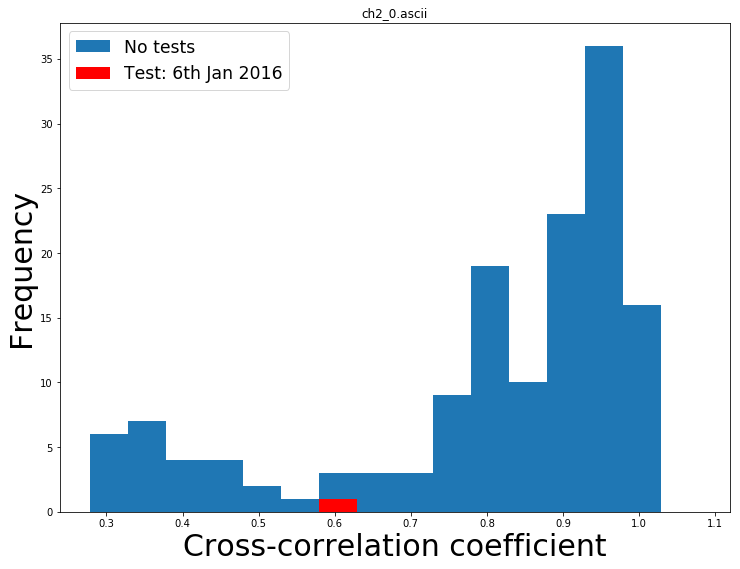

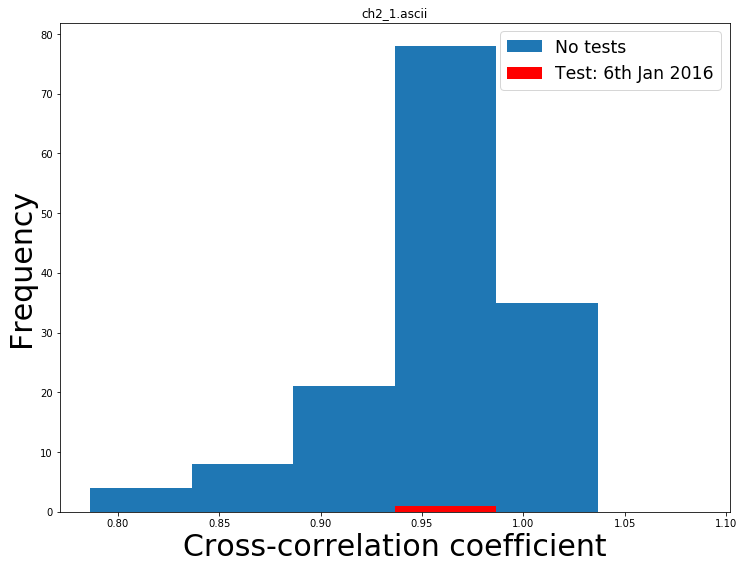

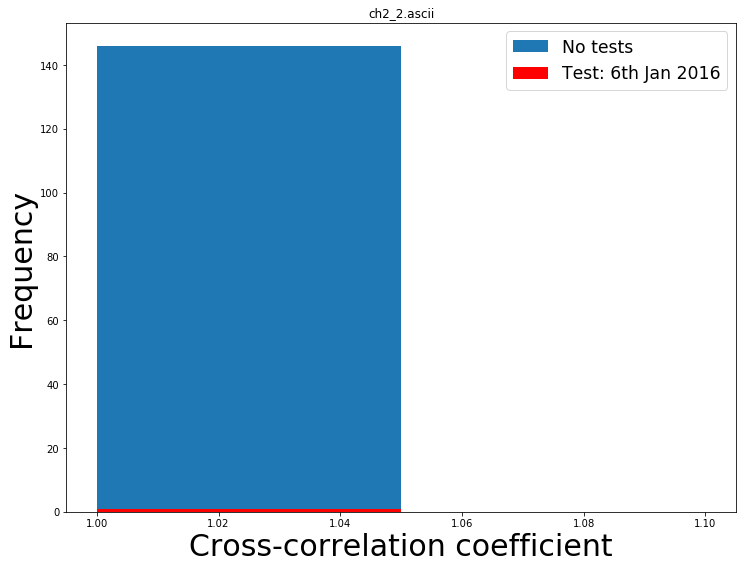

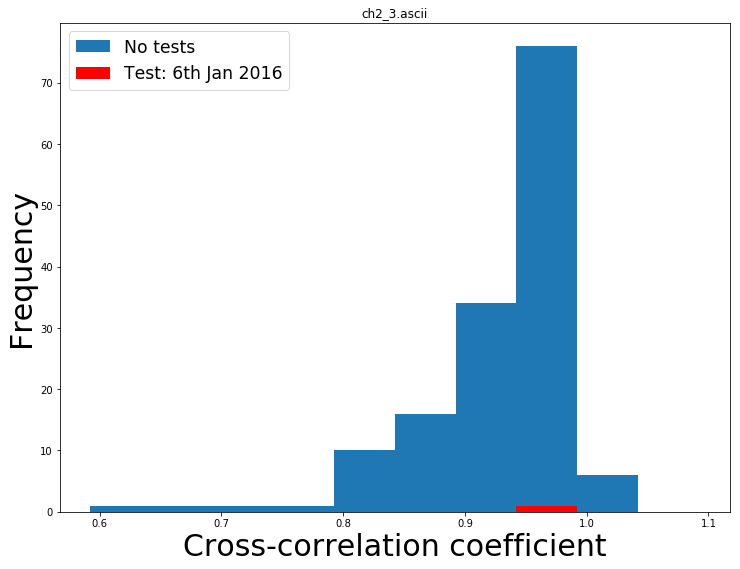

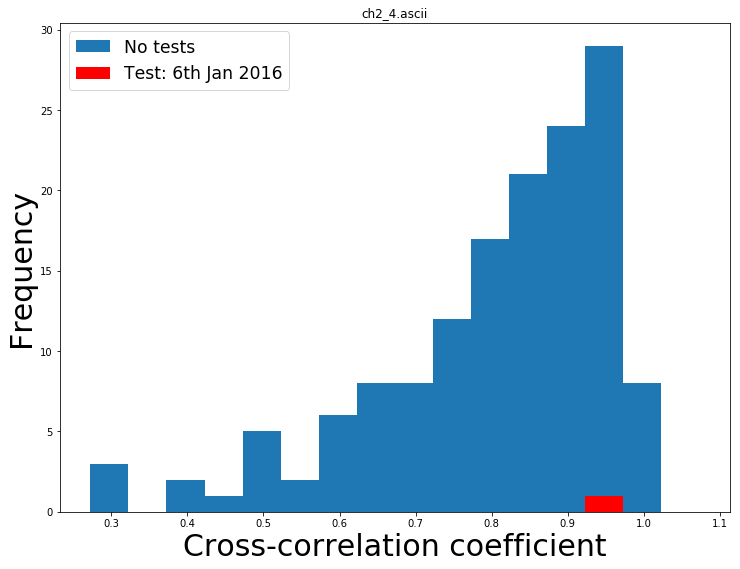

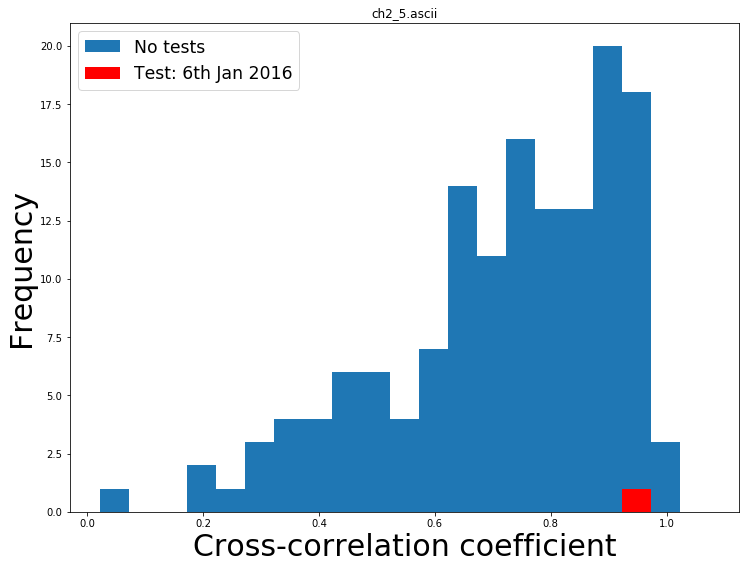

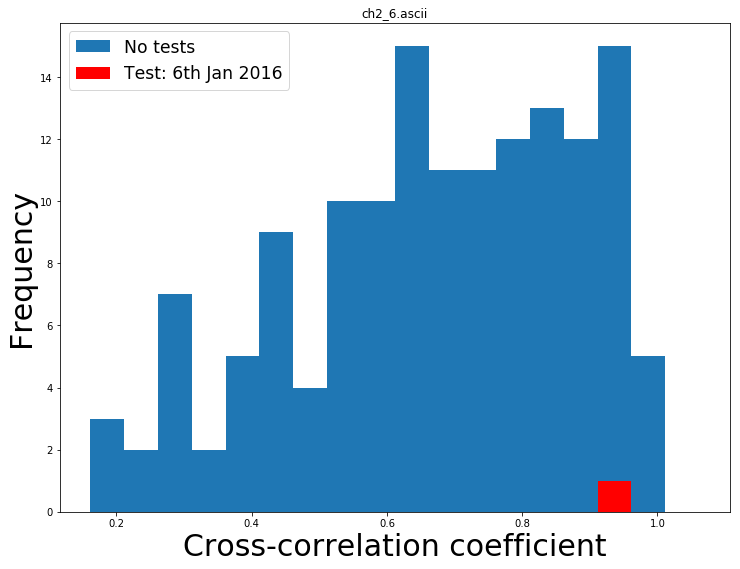

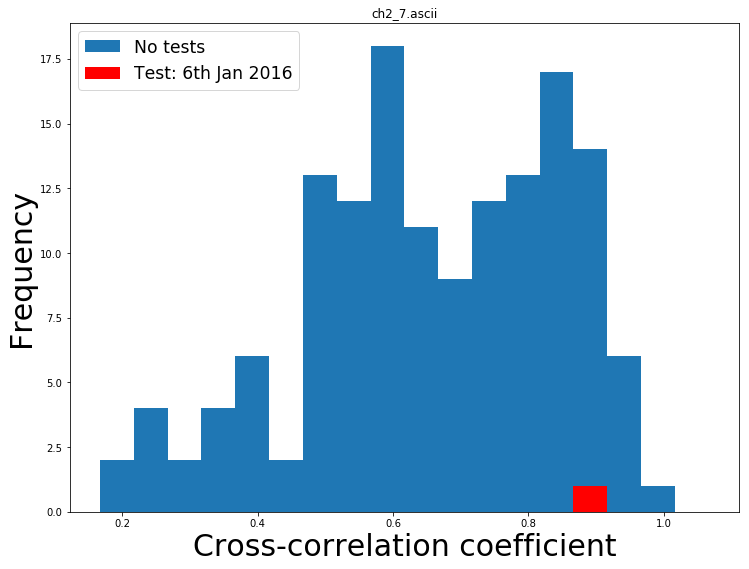

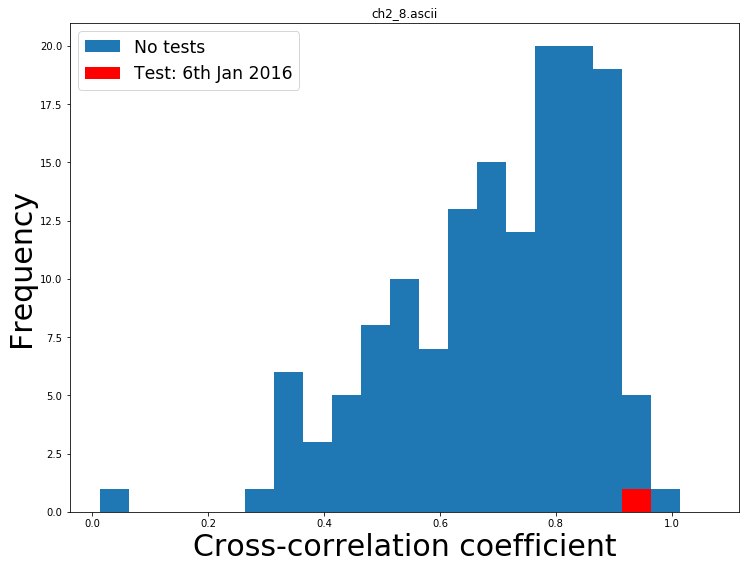

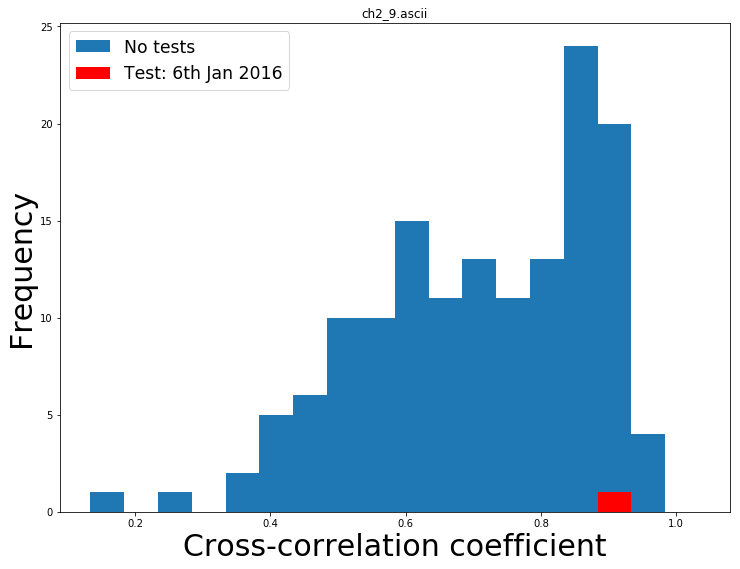

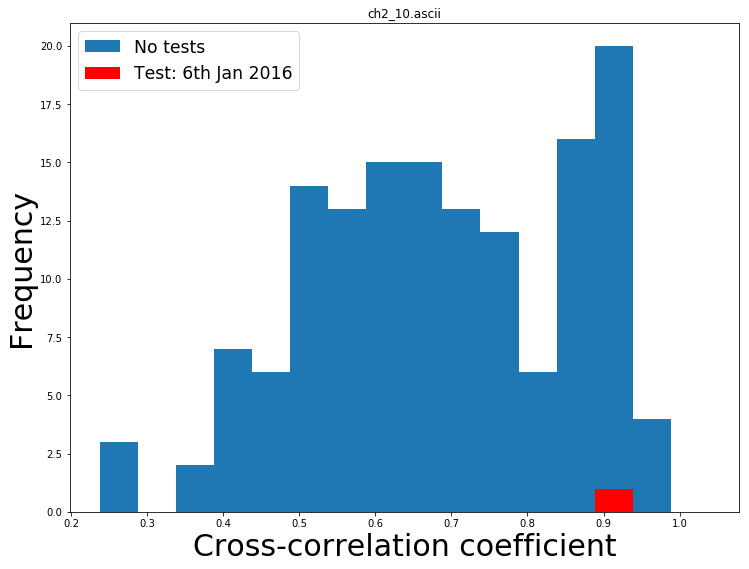

In [15]:
for i in range(11):
    fname = 'ch2_'+str(i)+'.ascii'
    fig = plt.figure(figsize=(12, 9))
    ax = fig.add_subplot(111)
    cor = np.loadtxt(fname)
    ax.hist(cor, bins = np.arange(min(cor), max(cor)+0.1, 0.05), label = 'No tests')
    ax.hist(xv[i], np.arange(min(cor), max(cor)+0.1, 0.05), color = 'red', label = 'Test: 6th Jan 2016')
    plt.title(fname)
    plt.xlabel('Cross-correlation coefficient', fontsize = 30)
    plt.ylabel('Frequency', fontsize = 30)
    plt.legend(fontsize = 'xx-large')
    plt.show()

In [16]:
#Test 9th Sept 2016

start_date = datetime(2016,9,4,0,0,0);
end_date = datetime(2016,9,10,0,0,0);
ms = gps_particle_data.meta_search();
ms.load_data(start_date,end_date);

dcor = {}
signal = 'rate_electron_measured'
output_data = ms.get_all_data_by_satellite()
for i in range(11):
    a0 = np.asarray(output_data[56][signal])[:,2]
    ar2 = np.asarray(output_data[56][signal])[:,i]
    cor = np.correlate(a0, ar2)/(math.sqrt(np.sum(a0**2)*np.sum(ar2**2)))
    dcor.update({i:cor})
print dcor


Loading data for satellite  56
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns56/ns56_160904_v1.03.ascii
{0: array([ 0.99544243]), 1: array([ 0.99867596]), 2: array([ 1.]), 3: array([ 0.99523229]), 4: array([ 0.973753]), 5: array([ 0.9456183]), 6: array([ 0.91940475]), 7: array([ 0.88566425]), 8: array([ 0.88723489]), 9: array([ 0.92252189]), 10: array([ 0.91851611])}


In [17]:
xv = dcor.values()
for i in range(len(xv)):
    sum_bins_up_to = []
    fname = 'ch2_'+str(i)+'.ascii'
    cor = np.loadtxt(fname)
    sort = np.histogram(cor, bins = np.arange(min(cor), max(cor)+0.1, 0.05))
    for j in range(len(sort[1])):
        if sort[1][j] <= xv[i] <= sort[1][j+1]:
            for k in np.arange(j+1):
                sum_bins_up_to.append(sort[0][k])
            tot_sum_up_to = np.sum(sum_bins_up_to)
            pvalue = float(tot_sum_up_to)/float(np.sum(sort[0]))
            print fname, xv[i], '%.2f' % (pvalue)

ch2_0.ascii [ 0.99544243] 1.00
ch2_1.ascii [ 0.99867596] 1.00
ch2_2.ascii [ 1.] 1.00
ch2_3.ascii [ 0.99523229] 1.00
ch2_4.ascii [ 0.973753] 1.00
ch2_5.ascii [ 0.9456183] 0.98
ch2_6.ascii [ 0.91940475] 0.97
ch2_7.ascii [ 0.88566425] 0.95
ch2_8.ascii [ 0.88723489] 0.96
ch2_9.ascii [ 0.92252189] 0.97
ch2_10.ascii [ 0.91851611] 0.97


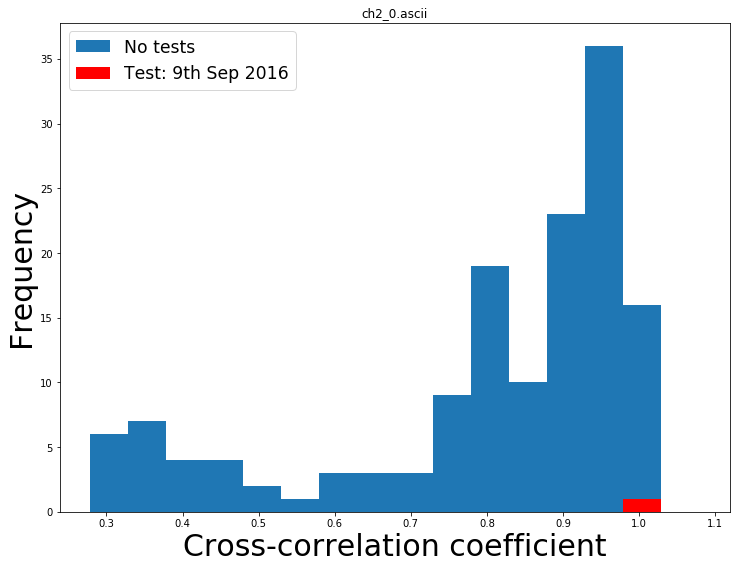

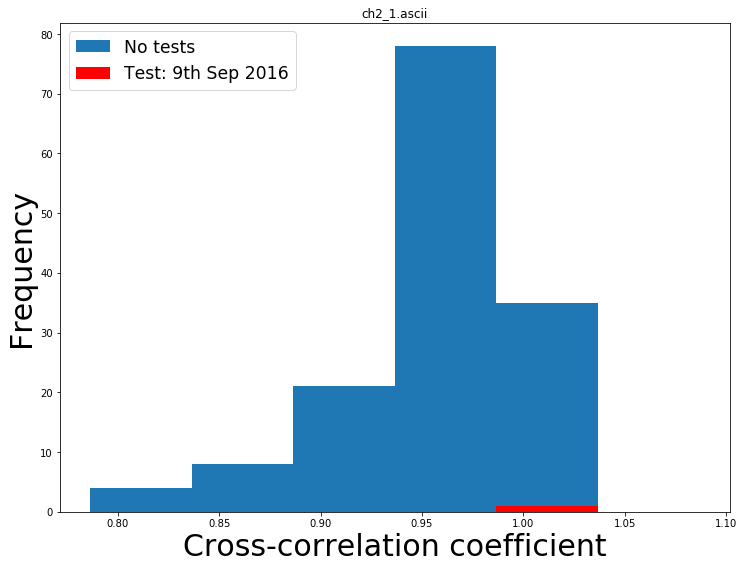

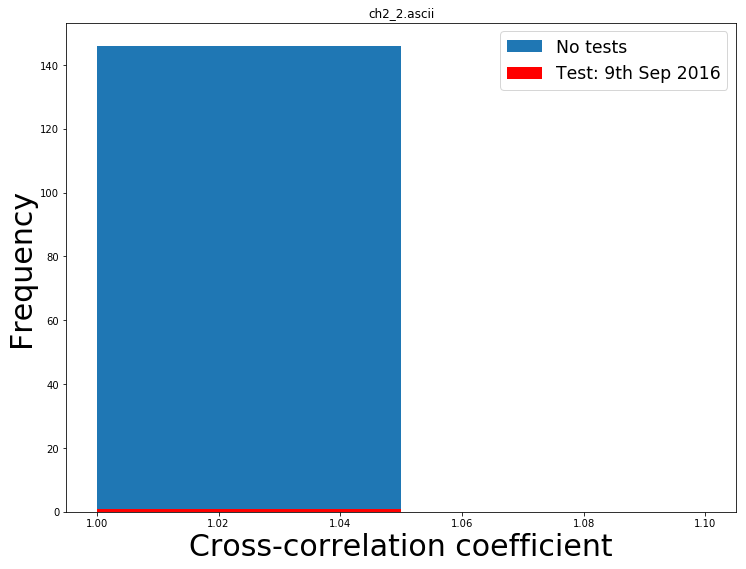

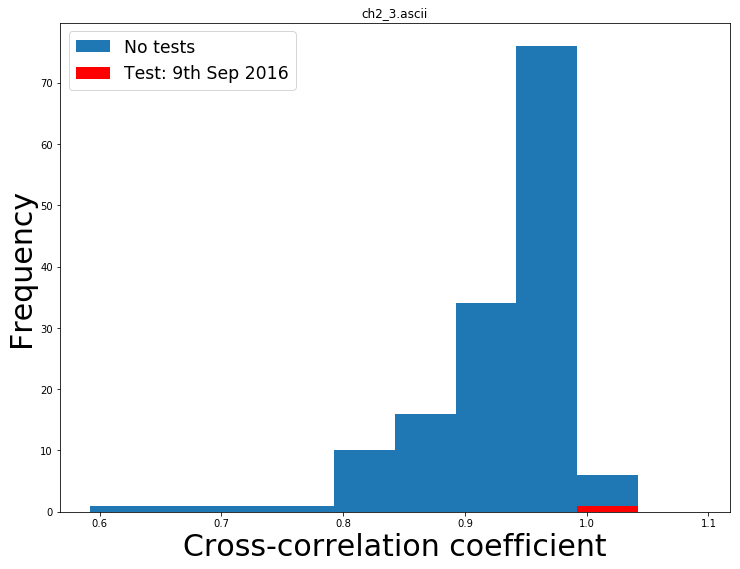

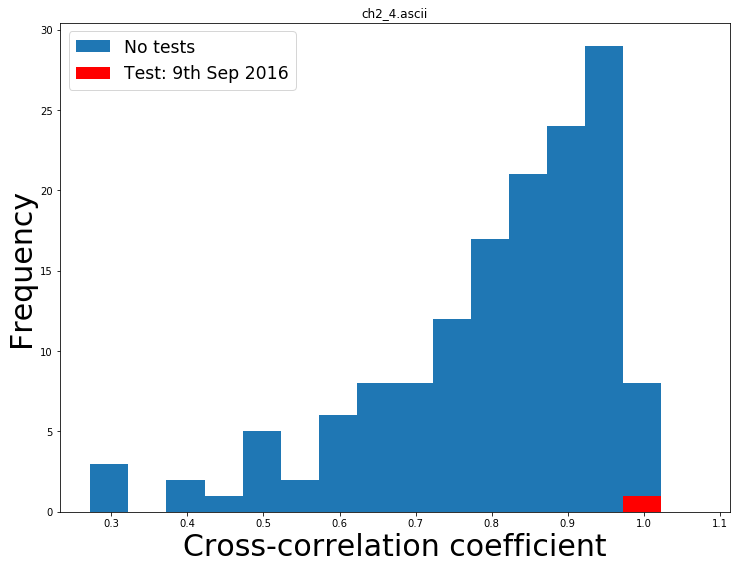

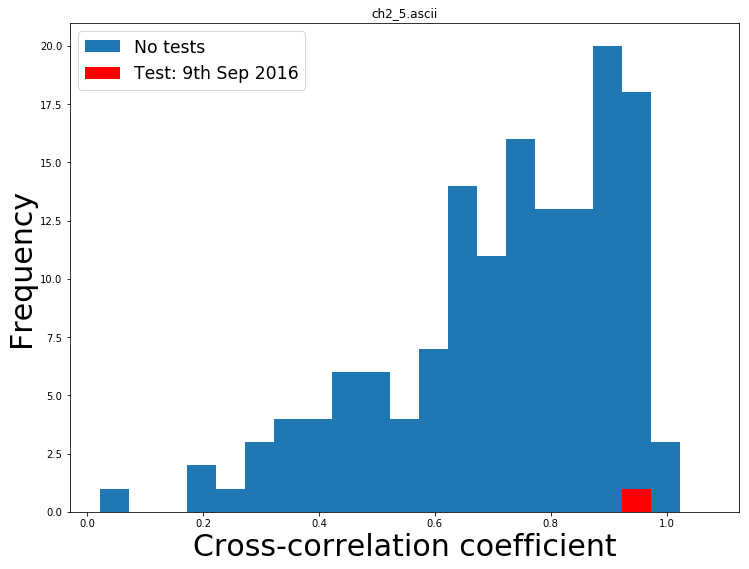

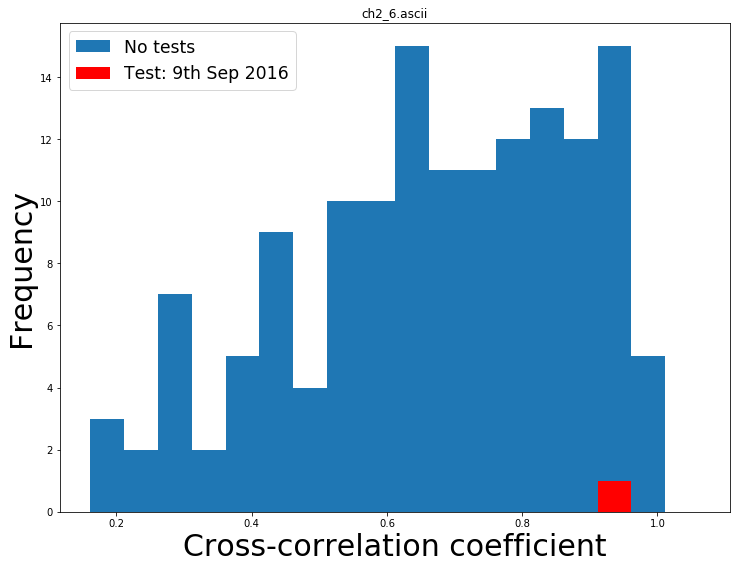

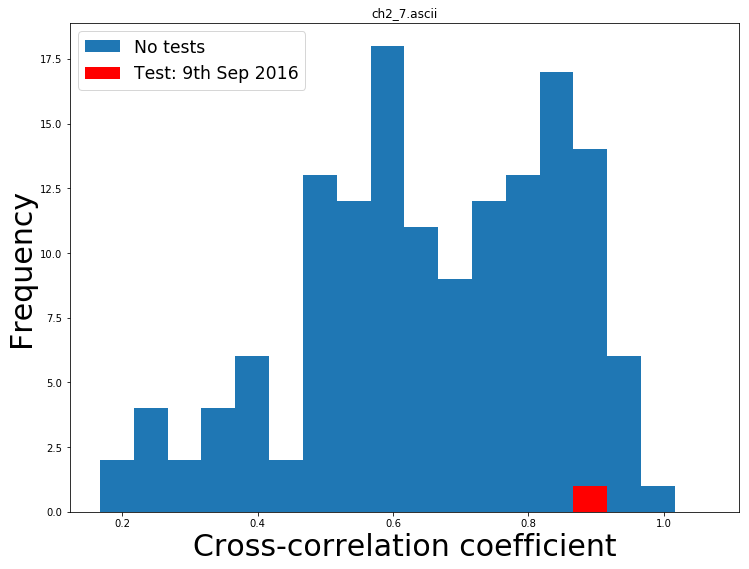

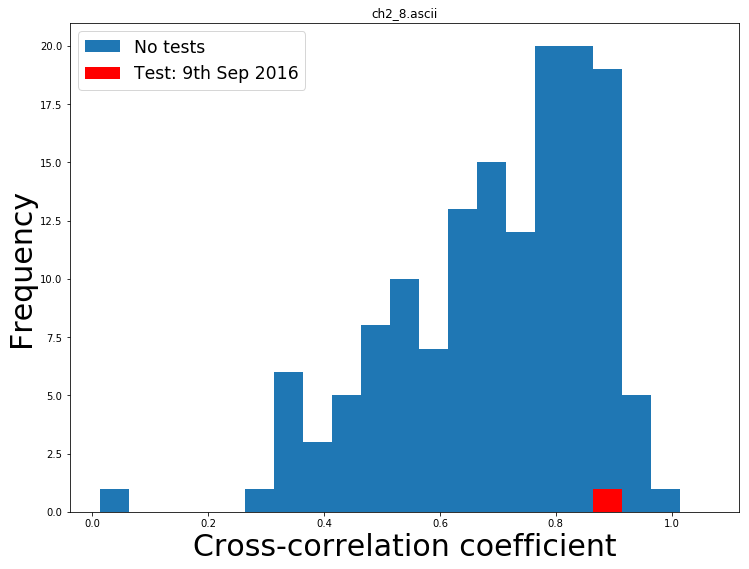

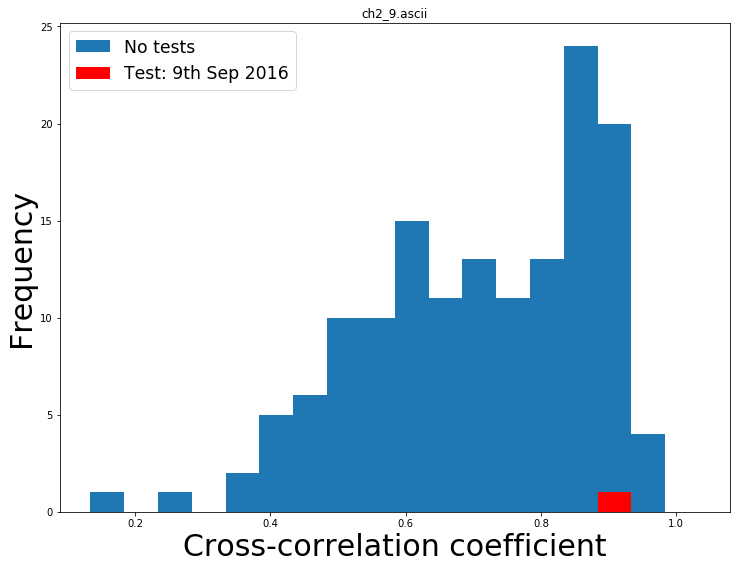

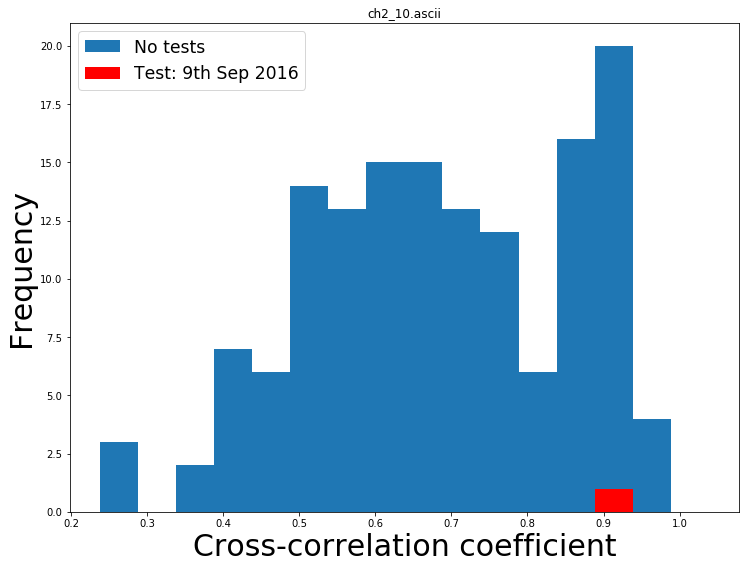

In [18]:
for i in range(11):
    fname = 'ch2_'+str(i)+'.ascii'
    fig = plt.figure(figsize=(12, 9))
    ax = fig.add_subplot(111)
    cor = np.loadtxt(fname)
    ax.hist(cor, bins = np.arange(min(cor), max(cor)+0.1, 0.05), label = 'No tests')
    ax.hist(xv[i], np.arange(min(cor), max(cor)+0.1, 0.05), color = 'red', label = 'Test: 9th Sep 2016')
    plt.title(fname)
    plt.xlabel('Cross-correlation coefficient', fontsize = 30)
    plt.ylabel('Frequency', fontsize = 30)
    plt.legend(fontsize = 'xx-large')
    plt.show()